# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1) Which variables are significant in predicting the demand for shared bikes
    2) How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

#  Below are steps to be to followed:

1) Data loading, Visualization & analysis (EDA)

2) Data Preparation

3) Model training and testing

4) RFE method
5) Residual analysis
6) Prediction and evaluation of the test set

## Step 1: Reading and Understanding of data

In [283]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [284]:
#importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [285]:
#loading Day dataset bmb_df dataframe

bmb_df = pd.read_csv("day.csv")

In [288]:
#checking the dataframe

bmb_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [289]:
#checking the shape of the dataframe
bmb_df.shape

(730, 16)

In [290]:
bmb_df.info() # columns, data type and null value check 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [291]:
# Null Value check: It is obserbed that no null value found.

bmb_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [292]:
bmb_df.describe()
#The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [293]:
# Check for duplicate data
dups = bmb_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
bmb_df[dups]

Number of duplicate rows = 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


##### We can clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute, it should be same as before

If we had duplicate values then we would remove them from the dataset

#### Data Visualisation

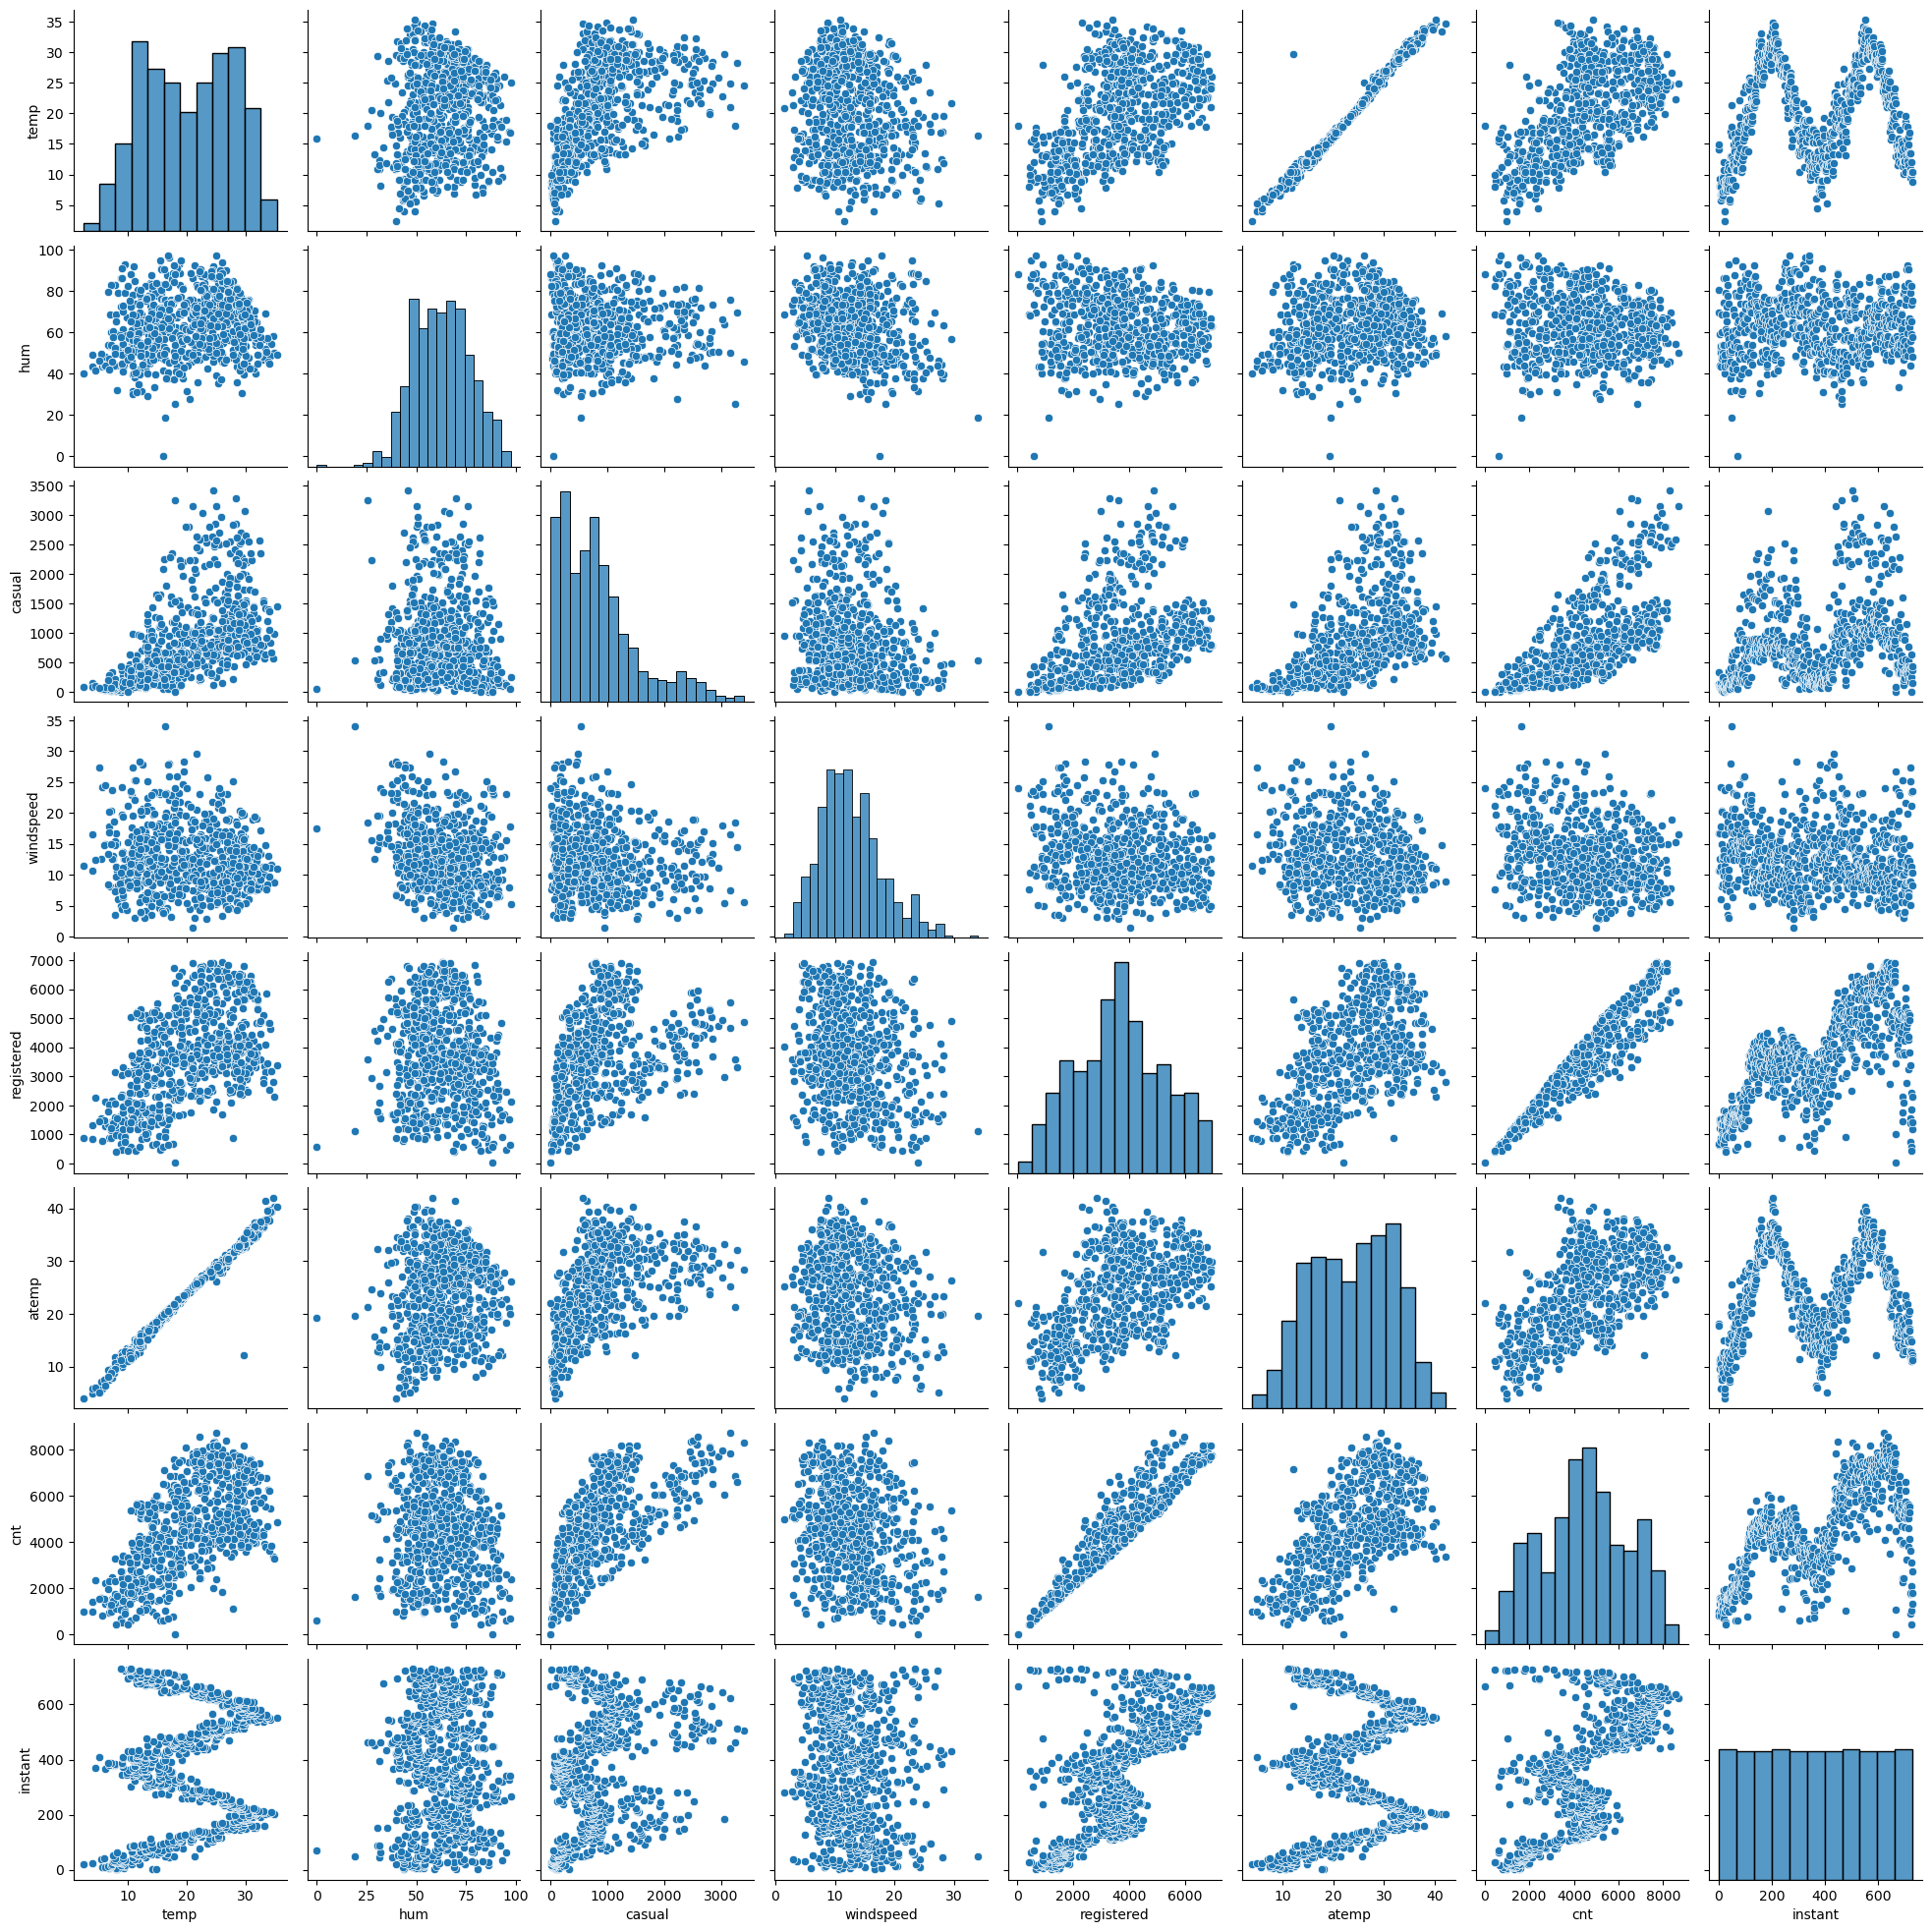

In [294]:
# pairplot of numeric variables of the datafram
sns.pairplot(bmb_df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt', 'instant'])
plt.show()

In [295]:
# mapping categorical variables with their subcategories to help with visualization analysis 
bmb_df['season']=bmb_df.season.map({1: 'spring', 2: 'summer',3:'autumn', 4:'winter' })
bmb_df['mnth']=bmb_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bmb_df['weathersit']=bmb_df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bmb_df['weekday']=bmb_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bmb_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


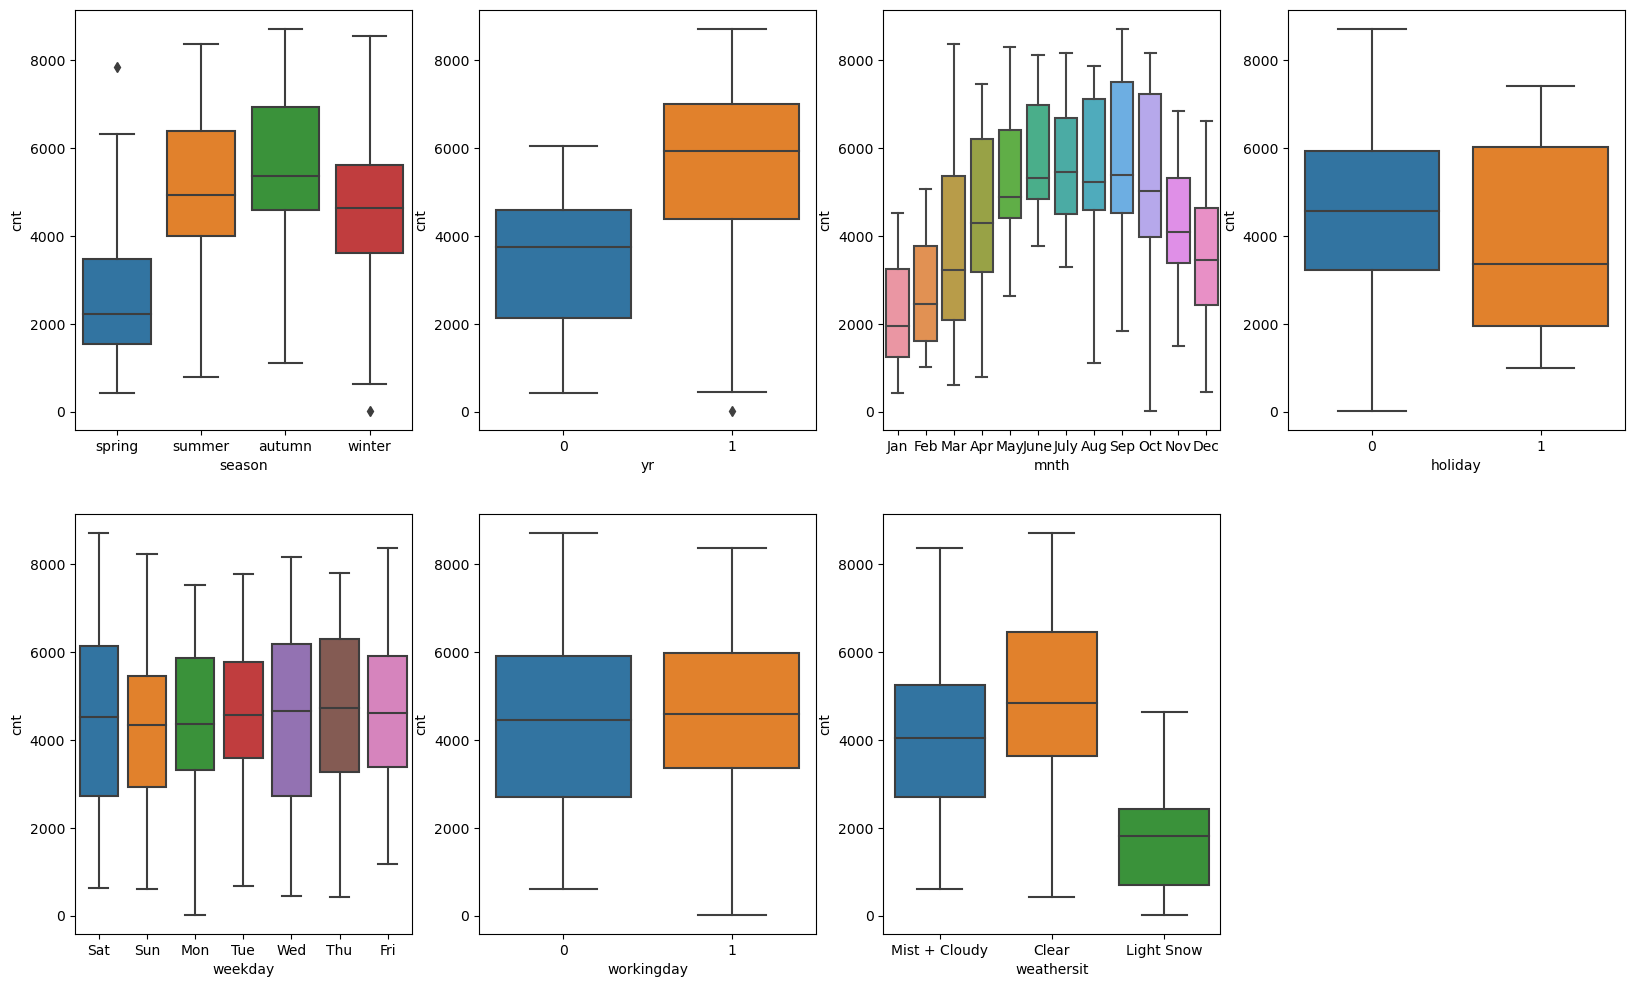

In [296]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bmb_df)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=bmb_df)
plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=bmb_df)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=bmb_df)
plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=bmb_df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bmb_df)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=bmb_df)
plt.show()

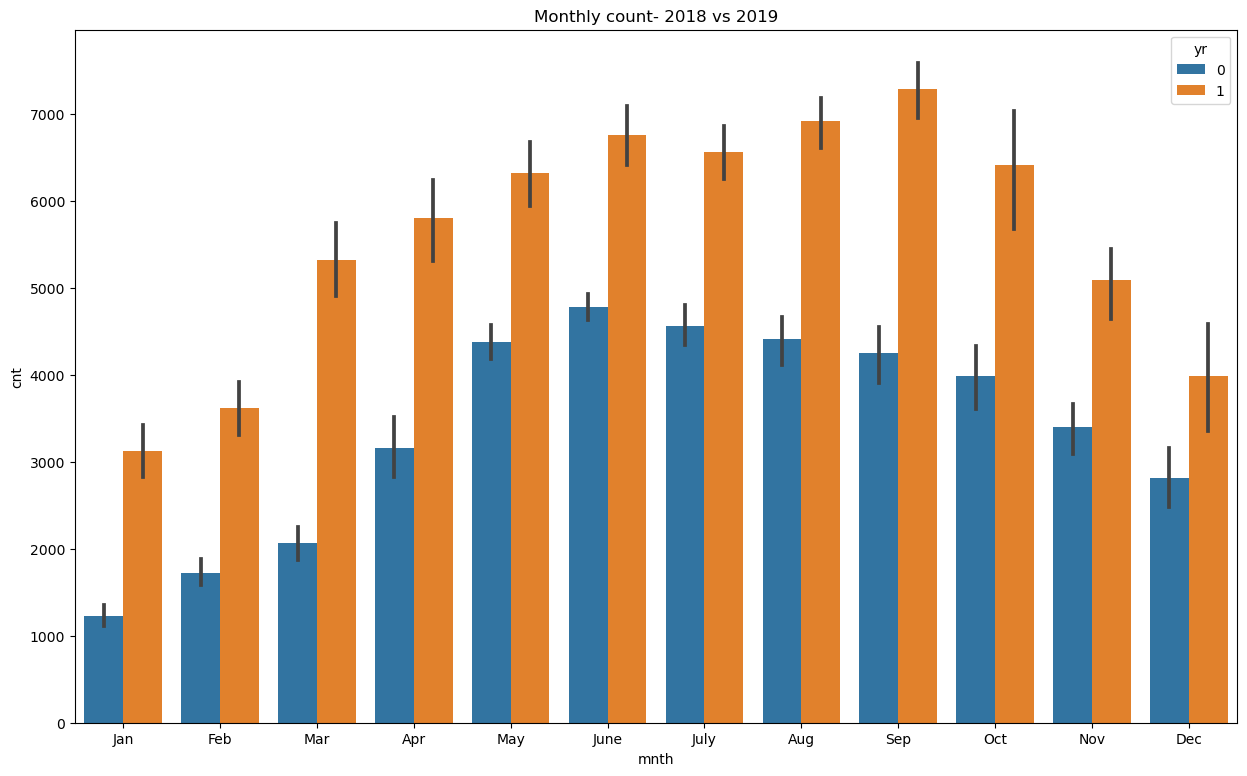

In [297]:
plt.figure(figsize=(15, 9))
sns.barplot(x='mnth',y= 'cnt', hue='yr',data = bmb_df)
plt.title('Monthly count- 2018 vs 2019')
plt.show()

#### Observations:

1) Boom Bike gets most of their bike rented during autumn followed by summer.

2) September and October being the best month for bike renting

3) Saturday and Thursday are the days when bikes are rented more.

4) Bike are rented in the clear weather mostly 

5) Bikes were rented more in 2019 when compared to 2018

## Step 2: Data Preparation

In [298]:
# Generating Corr & Heatmap to determine the correlation among varaibles
cor = bmb_df.corr()
cor

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.004619,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.004619,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.150738,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


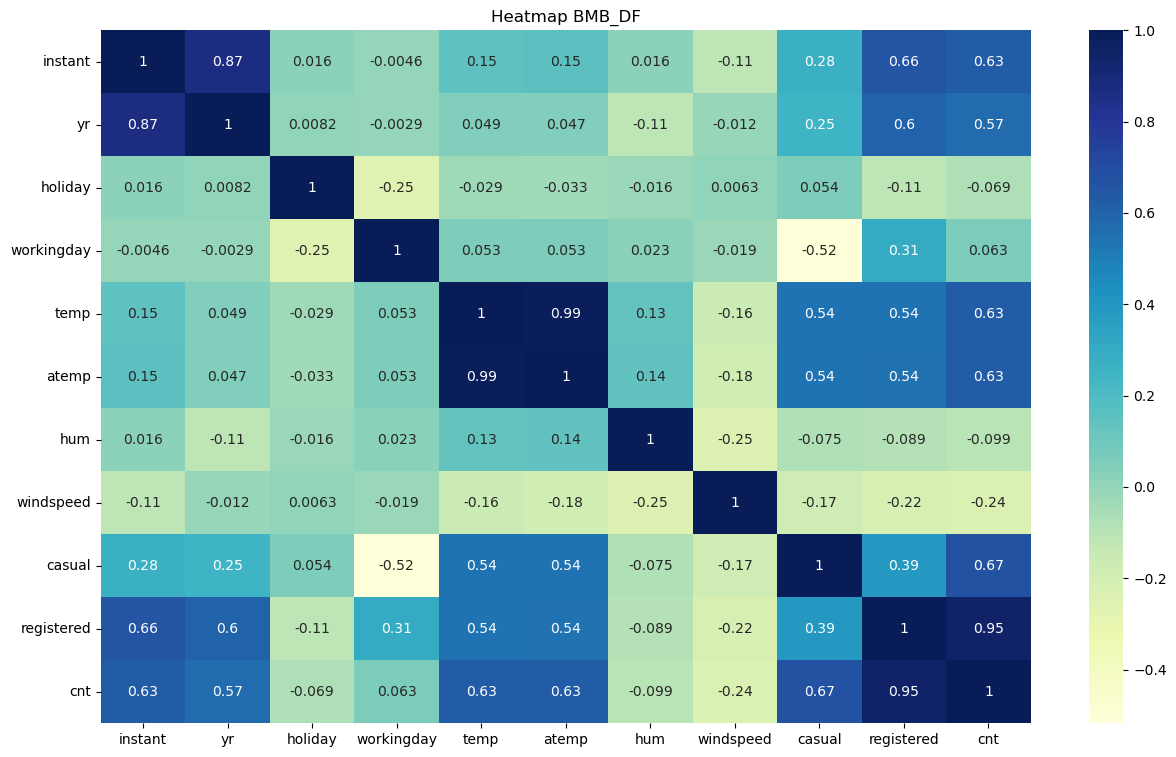

In [299]:
plt.figure(figsize=(15, 9))
sns.heatmap(bmb_df.corr(), cmap='YlGnBu', annot=True)
plt.title('Heatmap BMB_DF')
plt.show()

As per heatmap, there are many variables correlated to target variable (cnt) such as registered, casual, temp, atemp, yr, workingday.

In [300]:
#dropping non-required variables from the datafram 
#dropping the variables atemp as this synonymous to temp and how wheather feels like and also having correlation with temp as.99 socan be dropped. instant, dteday, casual, registered as they are not needed for the analysis 
#dteday is calendar date in accending order and instant is just the count of records 
# casual & registered user sum is cnt so both are also not required for regression analysis as the target variable is cnt.

bmb_df = bmb_df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
bmb_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [301]:
bmb_df.shape

(730, 11)

In [302]:
bmb_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [303]:
#creating dummy variables for the variables of month, weekday, weathersit, seasons
season = pd.get_dummies(bmb_df.season, drop_first=True)
month = pd.get_dummies(bmb_df.mnth, drop_first=True)
weekday = pd.get_dummies(bmb_df.weekday, drop_first=True)
weathersit = pd.get_dummies(bmb_df.weathersit, drop_first=True)


In [304]:
#extending dummy variables
bmb_df = pd.concat([bmb_df,month, weekday, weathersit, season], axis=1)
bmb_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [305]:
# dropping variables for season,mnth,weekday,weathersit 
bmb_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bmb_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [306]:
bmb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

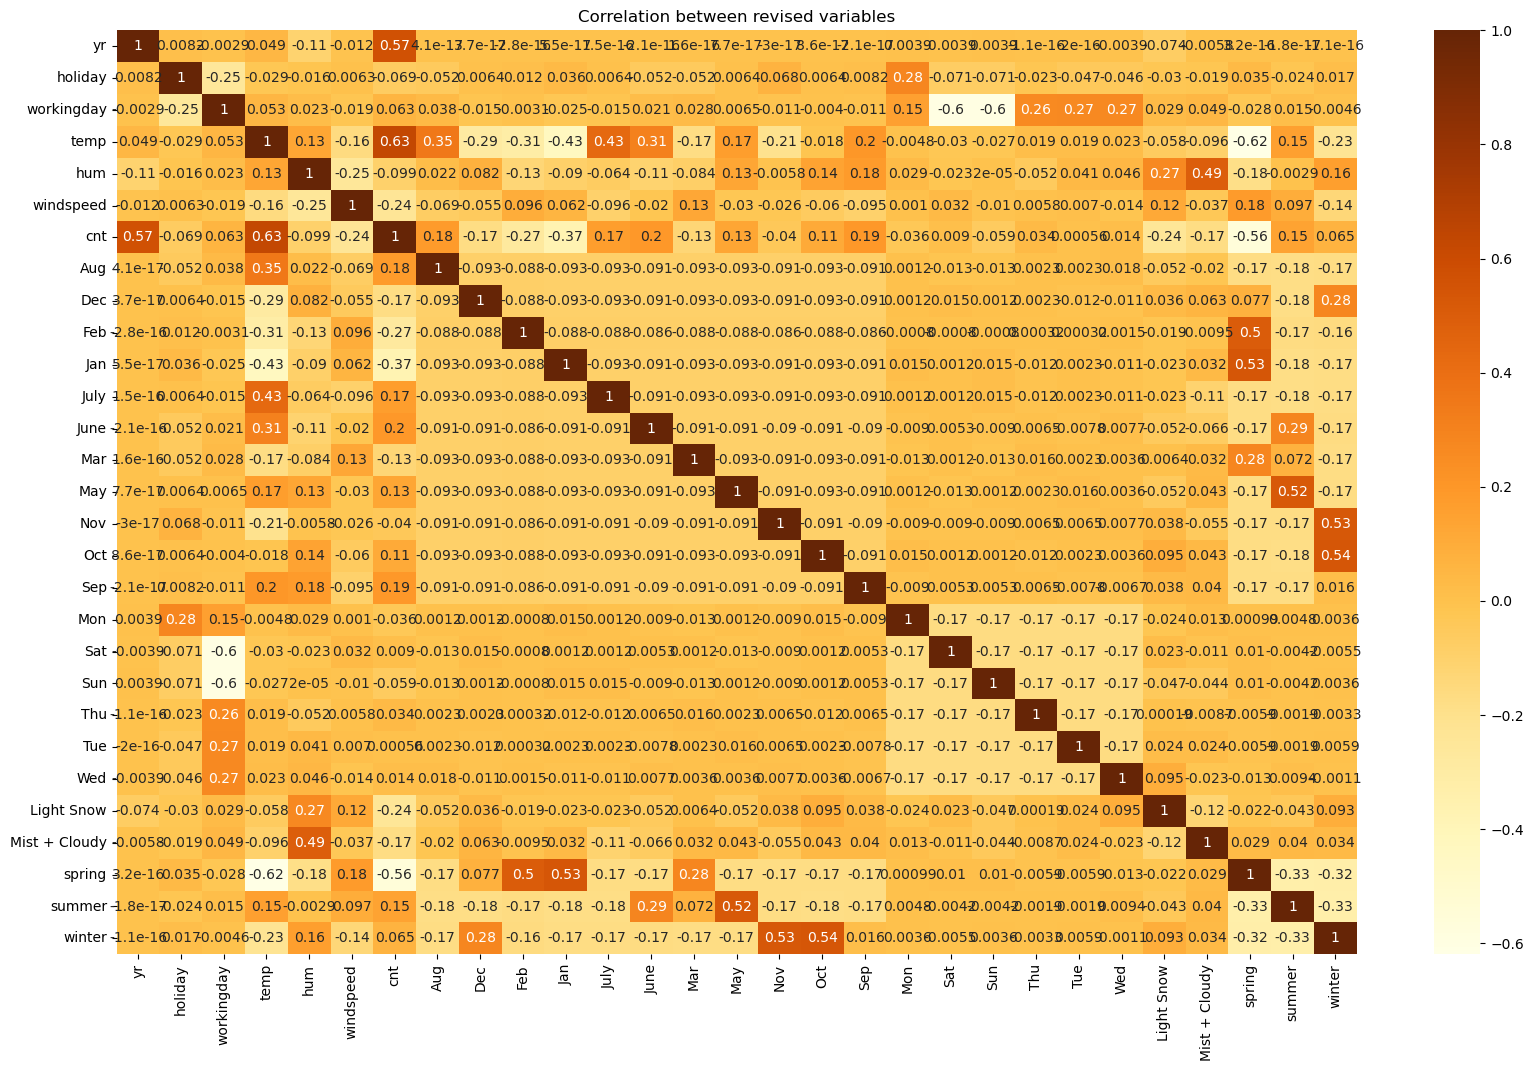

In [307]:
#Heatmap with new Vars 
plt.figure(figsize=(20, 12))
sns.heatmap(bmb_df.corr(), cmap='YlOrBr', annot=True)
plt.title('Correlation between revised variables')
plt.show()

## 3. Model training and testing
##### Create X and Y
##### Create train and test sets (70-30, 80-20).
##### Train your model on training sets.
##### Scaling variables
##### Evaluate your model on trating and test sets.

In [308]:
#Datafram split into train and test sets
bmb_df_train, bmb_df_test = train_test_split(bmb_df, train_size=0.7, random_state=100)

In [309]:
#checking the shape of the training dataset
bmb_df_train.shape

(510, 29)

In [310]:

bmb_df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,0,0,...,0,0,0,0,0,0,1,0,1,0


##### Scaling the variables using MinMaxScaler

Here we can see that except for 'temp','hum' 'windspeed' & 'cnt', all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.


In [311]:
scaler = MinMaxScaler()
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
bmb_df_train[scaler_var] = scaler.fit_transform(bmb_df_train[scaler_var])

In [312]:
#checking the normalized values of the train set after performing scaling 
bmb_df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


the max value is 1 for all the variables so scaling was successful. 

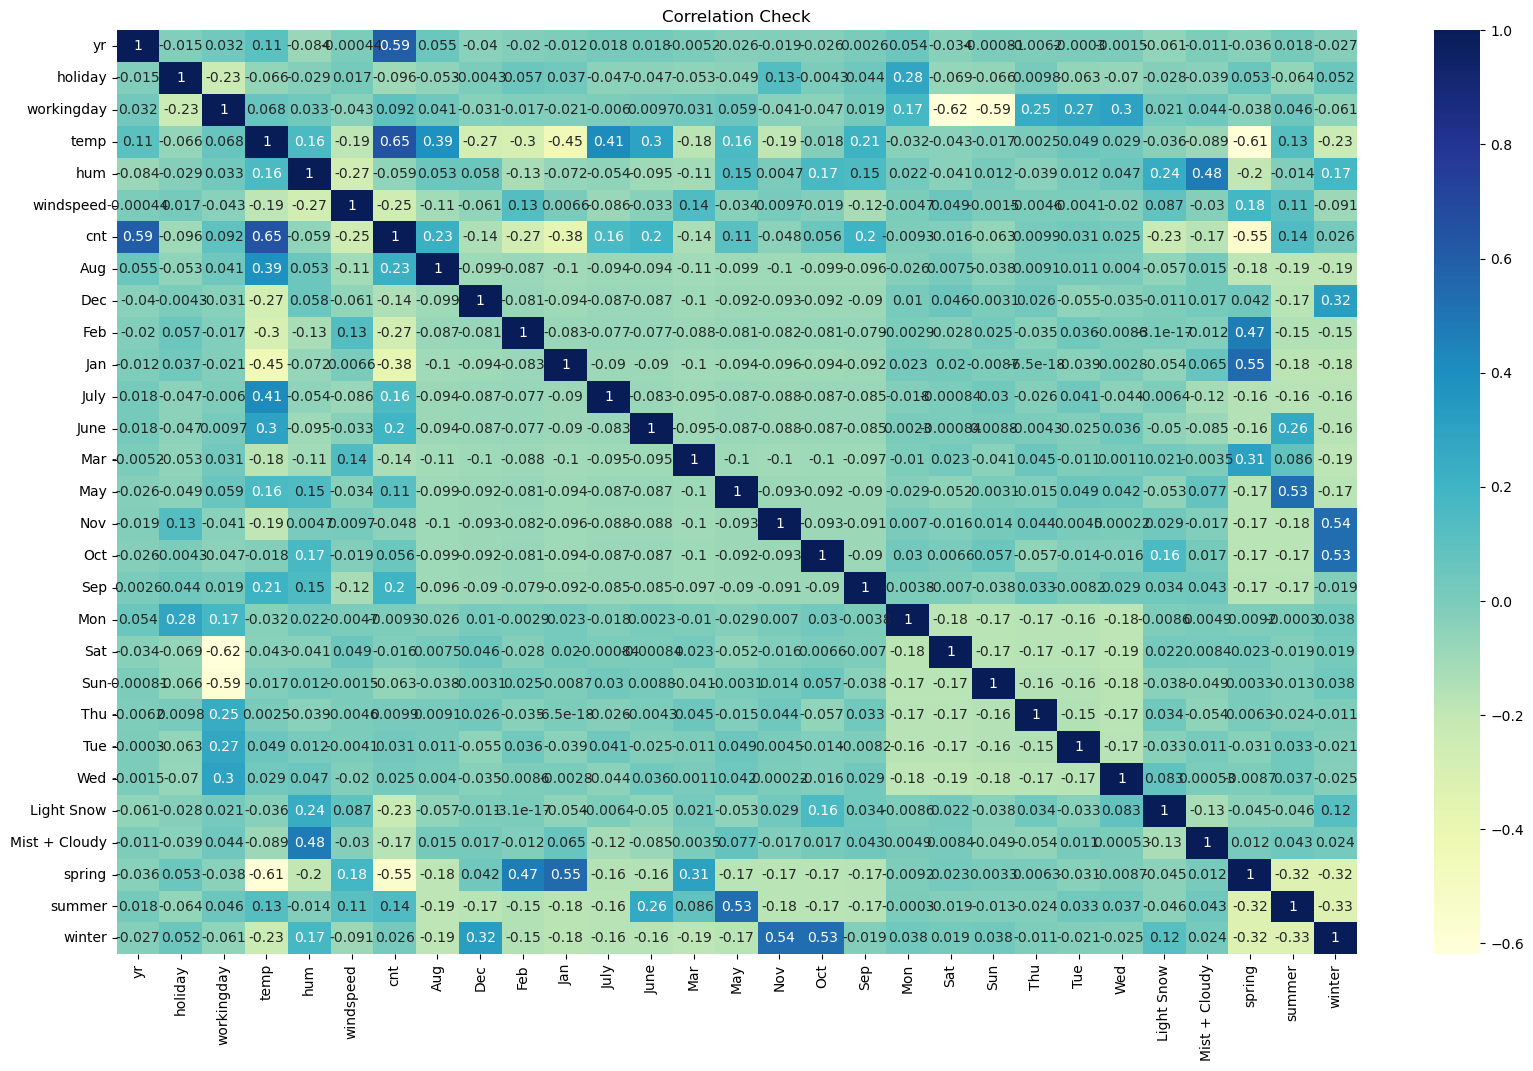

In [313]:
# checking the correlation coefficients post scaling
plt.figure(figsize = (20, 12))
sns.heatmap(bmb_df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Check')
plt.show()

As per heatmap, var 'temp' is highly correlated with 'cnt' so  Let's see a pairplot for 'temp' vs 'cnt'

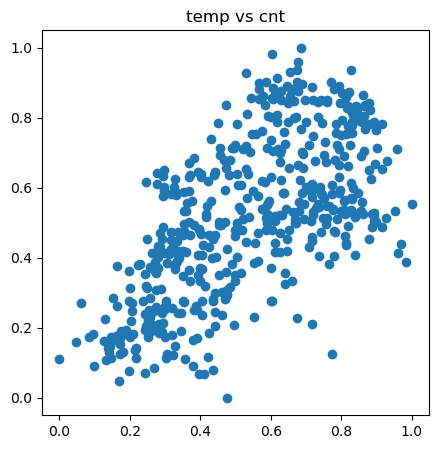

In [314]:
plt.figure(figsize=[5,5])
plt.scatter(bmb_df_train.temp, bmb_df_train.cnt)
plt.title('temp vs cnt')
plt.show()

##### Building model on train data

In [315]:
# Defining x and y: Y being the target var

y_train = bmb_df_train.pop('cnt')
X_train = bmb_df_train

In [316]:
#checking the variables
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [317]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [318]:
#adding constant/intercept
X_train_sm = sm.add_constant(X_train['temp'])

#create first fitted model
lr_model = sm.OLS(y_train, X_train_sm).fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [319]:
# model1 Summery 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.46e-61
Time:                        19:59:39   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is .416 which means that 41% of the variance in the cnt can be explained by temp

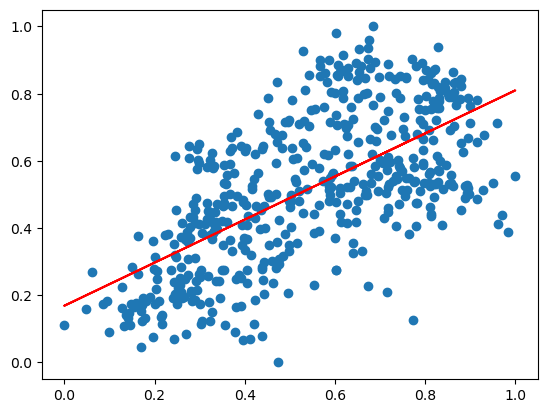

In [320]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [321]:
# Print a summary of the linear regression model obtained
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.46e-61
Time:                        19:59:46   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

In [322]:
#adding another variable 'yr' in model

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#building second fitted model
lr_model = sm.OLS(y_train, X_train_sm).fit()
#params
lr_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [323]:
#checking summary with temp and yr as selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.34e-130
Time:                        19:59:50   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, R-squared has incrasred to .692 which means that 69% of the variance in the cnt can be explained by vars temp and yr

In [324]:
#adding all variables and finding out the R-squared values
bmb_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [325]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#building third fitted model
lr_model = sm.OLS(y_train, X_train_sm).fit()

#params
lr_model.params

const            0.243106
yr               0.232438
holiday          0.010042
workingday       0.096177
temp             0.445359
hum             -0.151473
windspeed       -0.186010
Aug              0.020376
Dec             -0.044277
Feb             -0.032441
Jan             -0.063315
July            -0.033848
June             0.004602
Mar              0.001274
May              0.024673
Nov             -0.039879
Oct              0.007546
Sep              0.085938
Mon             -0.020931
Sat              0.095554
Sun              0.041333
Thu             -0.009131
Tue             -0.017931
Wed             -0.005495
Light Snow      -0.255835
Mist + Cloudy   -0.059551
spring          -0.044834
summer           0.043002
winter           0.107632
dtype: float64

In [326]:
#checking summary with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.00e-181
Time:                        20:00:06   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2431      0.035      6.888      0.000       0.174       0.312
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0100      0.024      0.418      0.676      -0.037       0.057
workingday        0.0962      0.012      7.835      0.000       0.072       0.120
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug               0.0204      0.034      0.607      0.544      -0.046       0.086
Dec              -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb              -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan              -0.0633      0.034     -1.885      0.060      -0.129       0.003
July             -0.0338      0.035     -0.969      0.333      -0.102       0.035
June              0.0046      0.025      0.186      0.853      -0.044       0.053
Mar               0.0013      0.025      0.052      0.959      -0.047       0.050
May               0.0247      0.021      1.173      0.241      -0.017       0.066
Nov              -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct               0.0075      0.036      0.210      0.834      -0.063       0.078
Sep               0.0859      0.032      2.692      0.007       0.023       0.149
Mon              -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat               0.0956      0.014      6.958      0.000       0.069       0.123
Sun               0.0413      0.014      2.964      0.003       0.014       0.069
Thu              -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue              -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed              -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light Snow       -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist + Cloudy    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer            0.0430      0.026      1.645      0.101      -0.008       0.094
winter            0.1076      0.028      3.853      0.000       0.053       0.163
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.88e+15
================================================================

R-squared is now .853 which means 85% of the variance in the count quantity is explained with all the variables

## Step 4 RFE: Recursive feature elimination 

In [327]:
#checking the number of columns in our dataset
len(bmb_df.columns)

29

In [330]:
# Automated selection of variable
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

# rfe ofject fitment on training dataset
rfe = rfe.fit(X_train, y_train)

In [331]:
# Checking automated 15 vars selected by RFE.fit
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [332]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [333]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [342]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [343]:
#adding constant to training data frameset
X_train_rfe = sm.add_constant(X_train_rfe)

#building first fitted training model
lr_model = sm.OLS(y_train, X_train_rfe).fit()

#params
lr_model.params

const            0.251893
yr               0.230527
holiday         -0.058173
workingday       0.043335
temp             0.509619
hum             -0.156299
windspeed       -0.186259
Jan             -0.034512
July            -0.052918
Sep              0.081395
Sat              0.053552
Light Snow      -0.247464
Mist + Cloudy   -0.056318
spring          -0.050897
summer           0.050762
winter           0.093301
dtype: float64

In [345]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.22e-191
Time:                        20:46:24   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
yr                0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
hum              -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
#dropping the constant variables
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [349]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


##### How to check the conditions for variables elimination?
Criteria to drop the variables

- High p-value, high VIF : definitely drop
- High-Low:

     1) High p, low VIF : remove these first, then build model again and check VIF again      
     2) Low p, high VIF : remove these later          
- Low p-value, low VIF : keep variable

In [257]:
#workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [258]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.10e-189
Time:                        19:53:32   Log-Likelihood:                 512.44
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     495   BIC:                            -931.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2920      0.035      8.344      0.000       0.223       0.361
yr                0.2305      0.008     28.422      0.000       0.215       0.246
holiday          -0.0933      0.026     -3.652      0.000      -0.143      -0.043
temp              0.5128      0.035     14.740      0.000       0.444       0.581
hum              -0.1651      0.038     -4.375      0.000      -0.239      -0.091
windspeed        -0.1887      0.026     -7.311      0.000      -0.239      -0.138
Jan              -0.0337      0.018     -1.915      0.056      -0.068       0.001
July             -0.0559      0.018     -3.060      0.002      -0.092      -0.020
Sep               0.0824      0.017      4.941      0.000       0.050       0.115
Sat               0.0177      0.011      1.602      0.110      -0.004       0.040
Light Snow       -0.2405      0.026     -9.141      0.000      -0.292      -0.189
Mist + Cloudy    -0.0532      0.010     -5.083      0.000      -0.074      -0.033
spring           -0.0519      0.021     -2.479      0.013      -0.093      -0.011
summer            0.0503      0.015      3.351      0.001       0.021       0.080
winter            0.0914      0.017      5.229      0.000       0.057       0.126
==============================================================================
Omnibus:                       64.600   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.650
Skew:                          -0.701   Prob(JB):                     7.81e-31
Kurtosis:                       5.135   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [260]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.75
4,windspeed,4.68
11,spring,4.35
13,winter,3.38
12,summer,2.79
10,Mist + Cloudy,2.29
0,yr,2.09
5,Jan,1.67
6,July,1.59


In [350]:
#Sat variable can be dropped due to p-value >.05
X_train_new_2 = X_train_lr1.drop(['Jan'], axis = 1)

In [351]:
#adding constant to training DF
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating Second training model
lr_model = sm.OLS(y_train, X_train_lr2).fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.31e-189
Time:                        21:12:13   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2803      0.035      8.112      0.000       0.212       0.348
yr                0.2298      0.008     28.287      0.000       0.214       0.246
holiday          -0.0939      0.026     -3.668      0.000      -0.144      -0.044
temp              0.5304      0.034     15.768      0.000       0.464       0.597
hum              -0.1697      0.038     -4.494      0.000      -0.244      -0.096
windspeed        -0.1834      0.026     -7.128      0.000      -0.234      -0.133
July             -0.0576      0.018     -3.144      0.002      -0.094      -0.022
Sep               0.0830      0.017      4.963      0.000       0.050       0.116
Sat               0.0175      0.011      1.574      0.116      -0.004       0.039
Light Snow       -0.2381      0.026     -9.037      0.000      -0.290      -0.186
Mist + Cloudy    -0.0532      0.010     -5.074      0.000      -0.074      -0.033
spring           -0.0564      0.021     -2.706      0.007      -0.097      -0.015
summer            0.0532      0.015      3.553      0.000       0.024       0.083
winter            0.0972      0.017      5.629      0.000       0.063       0.131
==============================================================================
Omnibus:                       63.217   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.046
Skew:                          -0.687   Prob(JB):                     2.87e-30
Kurtosis:                       5.125   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
#cCalculating the VIF for all vars

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [264]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.71
4,windspeed,4.66
10,spring,4.34
12,winter,3.36
11,summer,2.79
9,Mist + Cloudy,2.29
0,yr,2.09
5,Jan,1.67
6,July,1.59


In [353]:
# dropping 'hum' due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [357]:
#adding constant
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr_model = sm.OLS(y_train, X_train_lr3).fit()

#Summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.68e-186
Time:                        21:16:17   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1960      0.030      6.628      0.000       0.138       0.254
yr                0.2340      0.008     28.451      0.000       0.218       0.250
holiday          -0.0941      0.026     -3.605      0.000      -0.145      -0.043
temp              0.4924      0.033     14.839      0.000       0.427       0.558
windspeed        -0.1500      0.025     -5.974      0.000      -0.199      -0.101
July             -0.0525      0.019     -2.820      0.005      -0.089      -0.016
Sep               0.0766      0.017      4.515      0.000       0.043       0.110
Sat               0.0199      0.011      1.761      0.079      -0.002       0.042
Light Snow       -0.2846      0.025    -11.529      0.000      -0.333      -0.236
Mist + Cloudy    -0.0803      0.009     -9.176      0.000      -0.097      -0.063
spring           -0.0670      0.021     -3.174      0.002      -0.108      -0.026
summer            0.0468      0.015      3.078      0.002       0.017       0.077
winter            0.0816      0.017      4.733      0.000       0.048       0.115
==============================================================================
Omnibus:                       65.293   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.851
Skew:                          -0.706   Prob(JB):                     2.60e-31
Kurtosis:                       5.152   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [359]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.12
3,windspeed,4.62
10,summer,2.23
9,spring,2.10
0,yr,2.07
11,winter,1.79
4,July,1.58
8,Mist + Cloudy,1.55
5,Sep,1.34
6,Sat,1.19


In [361]:
#Sat variable can be dropped due to high p value
X_train_new_4 = X_train_lr3.drop(['Sat'], axis = 1)

In [362]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr_model = sm.OLS(y_train, X_train_lr4).fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.06e-187
Time:                        21:21:11   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
yr                0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp              0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
July             -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep               0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer            0.0465      0.015      3.051      0.002       0.017       0.076
winter            0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [364]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,July,1.58
7,Mist + Cloudy,1.55
5,Sep,1.34
6,Light Snow,1.08


In [365]:
#July is dropped because of low VIF and the high p-value
X_train_new_5 = X_train_lr4.drop(['July'], axis = 1)

In [366]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr_model = sm.OLS(y_train, X_train_lr5).fit()
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.47e-186
Time:                        21:23:01   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447      0.000       0.133       0.249
yr                0.2341      0.008     28.237      0.000       0.218       0.250
holiday          -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp              0.4777      0.033     14.423      0.000       0.413       0.543
windspeed        -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Sep               0.0910      0.016      5.566      0.000       0.059       0.123
Light Snow       -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist + Cloudy    -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring           -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer            0.0621      0.014      4.350      0.000       0.034       0.090
winter            0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [367]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [276]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.92
0,yr,2.07
7,spring,1.89
8,summer,1.63
3,Jan,1.60
6,Mist + Cloudy,1.56
9,winter,1.43
4,Sep,1.23
5,Light Snow,1.07
1,holiday,1.04


##### Final model selection:

1) The low (<0.05) or almost zero p-value of all the selected variables.
3) The VIF should be generally <5 and and all the variables are having that now. 

4) The R-squared value achieved is 82.7%. 

## Step 5: Residual analysis

In [368]:
X_train_lr5 = sm.add_constant(X_train_lr5)
#X_train_lm5.columns
X_train_lr5

,const,yr,holiday,temp,windspeed,Sep,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [369]:
# y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

Text(0.5, 0, 'Errors')

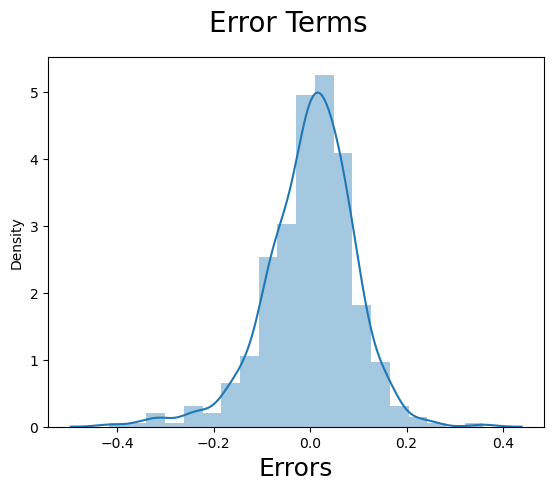

In [372]:
# Plot the histogram of the error terms (should be centred near 0 and shape should be normal distribution)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Step 6: Prediction and evaluation of the test set

In [374]:
#variables to be scaled on test set
scaler_var

['hum', 'windspeed', 'temp', 'cnt']

In [376]:
#min_MAX scaling 
bmb_df_test[scaler_var] = scaler.transform(bmb_df_test[scaler_var])

In [377]:
bmb_df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [378]:
y_test = bmb_df_test.pop('cnt')
X_test = bmb_df_test

In [379]:
#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [380]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [381]:
#Printing feature variables
X_train_lr5.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Sep', 'Light Snow',
       'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [382]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [384]:
#creating new X_test for RFE
X_test_new = X_test[X_train_lr5.columns]

#adding constant
X_test_new = sm.add_constant(X_test_new)

In [385]:
#making predictions
y_pred = lr_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

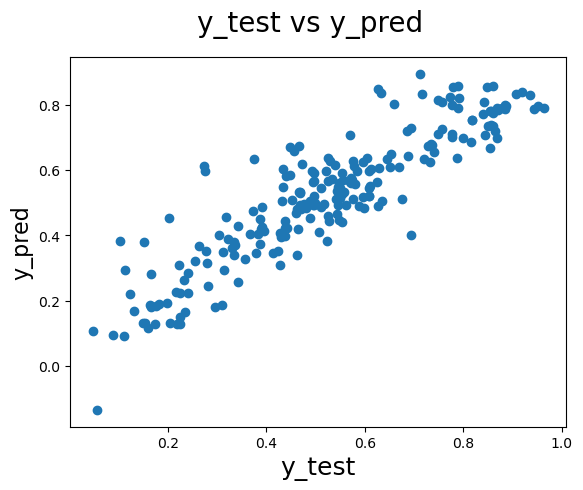

In [387]:
# Plotting y_test and y_pred to understand the spread.
# Model Eval
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [388]:
#r2-squared score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8038195990728842


In [389]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8327073211549113


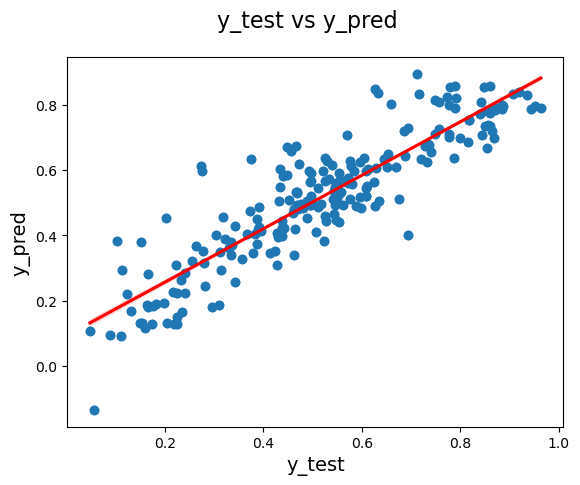

In [390]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

###### Equation of the best fitted line is:
    cnt = 0.2341×yr - 0.0963×holiday + 0.4777×temp - 0.1481×windspeed + 0.0910×Sep - 0.2850×LightSnow - 0.0787×MistCloudy - 0.0554×spring + 0.0621×summer + 0.09451×winter + 0.1909


    

In [391]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008409128123522073
Mean squared error of the test set is 0.00938022452381558


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

### Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1) The R-squared value of the train set and test set is 83.00%, 80.00% respectiviley. which suggest that model explains the variance accurately so based on R2 score it can be said that it is a good model. 

2) The final model has mean squared error near 0 for training and testing datasets. Same is the good indicator of variance is accurately predicted for the test set. 

3) The p-values and VIF of variables of finan model were with in precribed limit i.e. VIF < 5 and p-value <.05 

4) RFE was also conducted and Y_test vs y_pred residual were scattered near regression line.  

5) We can conclude following 
- the bike demands dependent on the temperature and whether.
- demand is more on the winters than summer and spring. 
- September and October had more demand than rest of the months. 
- Demand is more on Wed, Thurs and Sat and more on holidays. 

6) Bike rental had significantly increased demand in year 2019 when compared to 2018 which means that user are happy with the business idea. However, Boom Bike needs to focus on sprint and summer as demand were comparitively lower So, need to run more pronotional activities to drive the sales up another suggestion can be turning the casual customer as regular customer to have repeate business.  